In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Import Data

In [45]:
# read data to df
df = pd.read_csv('~/Desktop/spambase/spambase.data', header = None)
df.head()
# drop na values
df = df.dropna()
# change the column names
column_names = ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d",
               "word_freq_our","word_freq_over","word_freq_remove","word_freq_internet",
               "word_freq_order","word_freq_mail","word_freq_receive","word_freq_will",
               "word_freq_people","word_freq_report","word_freq_addresses","word_freq_free",
               "word_freq_business","word_freq_email","word_freq_you","word_freq_credit",
               "word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp",
               "word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs",
               "word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85",
               "word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct",
               "word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re",
               "word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(",
               "char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average",
               "capital_run_length_longest","capital_run_length_total","spam"]
df.columns = column_names
# df.head()

## Split Data

In [46]:
X = df.drop('spam', axis=1)  
y = df['spam']               

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# deal with imbalance training data
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# print(y_train_smote.value_counts())

## Parameter Tuning for Decision Tree, Logistic Regression and kNN

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

# Parameter Tuning 
np.random.seed(42)

# inner cross-validation folds
inner_cv = KFold(n_splits=5, shuffle=True)
# outer cross-validation folds
outer_cv = KFold(n_splits=5, shuffle=True) 


# Decision Tree Parameter Tuning

# Choosing optimal depth of the tree
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),        
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}], 
                                                                          
                  scoring='accuracy',                                     
                  cv=inner_cv)                                           

gs = gs.fit(X_train_smote,y_train_smote)
print(" Parameter Tuning #1")
print("Non-nested CV Accuracy: ", gs.best_score_)
print("Optimal Parameter: ", gs.best_params_)    
print("Optimal Estimator: ", gs.best_estimator_) 
nested_score_gs = cross_val_score(gs, X=X_train_smote, y=y_train_smote, cv=outer_cv) 
print("Nested CV Accuracy: ",nested_score_gs.mean(), " +/- ", nested_score_gs.std())


gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                               'criterion':['gini','entropy']}],
                  scoring='accuracy',
                  cv=inner_cv)

gs_dt = gs_dt.fit(X_train_smote,y_train_smote)
print("\n Parameter Tuning #2")
print("Non-nested CV Accuracy: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X_train_smote, y=y_train_smote, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

gs_dt2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                               'criterion':['gini','entropy'],
                               'min_samples_leaf':[1,2,3,4,5],
                               'min_samples_split':[2,3,4,5]}],
                  scoring='accuracy',
                  cv=inner_cv,
                  n_jobs=4)

gs_dt2 = gs_dt2.fit(X_train_smote,y_train_smote)
print("\n Parameter Tuning #3")
print("Non-nested CV Accuracy: ", gs_dt2.best_score_)
print("Optimal Parameter: ", gs_dt2.best_params_)
print("Optimal Estimator: ", gs_dt2.best_estimator_)
nested_score_gs_dt2 = cross_val_score(gs_dt2, X=X_train_smote, y=y_train_smote, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_dt2.mean(), " +/- ", nested_score_gs_dt2.std())

# Logistic Regression Parameter Tuning
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Choosing C parameter for Logistic Regression
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=0, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000]}],
                  scoring='accuracy',
                  cv=inner_cv)

gs_lr = gs_lr.fit(X_train_smote,y_train_smote)
print("\n Parameter Tuning #4")
print("Non-nested CV Accuracy: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X_train_smote, y=y_train_smote, cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())

# Choosing C parameter for Logistic Regression AND type of penalty 
gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=0, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=inner_cv)

gs_lr2 = gs_lr2.fit(X_train_smote,y_train_smote)
print("\n Parameter Tuning #5")
print("Non-nested CV Accuracy: ", gs_lr2.best_score_)
print("Optimal Parameter: ", gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)
nested_score_gs_lr2 = cross_val_score(gs_lr2, X=X_train_smote, y=y_train_smote, cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr2.mean(), " +/- ", nested_score_gs_lr2.std())

# kNN Parameter Tuning

#Normalize Data
pipe = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(p=2,
                                     metric='minkowski'))
      ])

#Parameters to optimize
params = {
        'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]
    }

# Choosing k for kNN
gs_knn = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='accuracy',
                  cv=inner_cv)

gs_knn = gs_knn.fit(X_train_smote,y_train_smote)
print("\n Parameter Tuning #6")
print("Non-nested CV Accuracy: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X_train_smote, y=y_train_smote, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())


# Parameters to optimize:  k for number of nearest neighbors AND type of distance

params = {
        'knn__n_neighbors': [2,4,6,8,10,12,14,16,18,20,22],
        'knn__weights': ['uniform', 'distance']
    }

gs_knn2 = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='accuracy',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn2 = gs_knn2.fit(X_train_smote,y_train_smote)
print("\n Parameter Tuning #7")
print("Non-nested CV Accuracy: ", gs_knn2.best_score_)
print("Optimal Parameter: ", gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X_train_smote, y=y_train_smote, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())

# naive bayes 
nb_pipe = Pipeline([
    ('sc', StandardScaler()),  # Naive Bayes doesn't require scaling, but we include it for consistency
    ('nb', GaussianNB())
])

# Perform nested cross-validation for Naive Bayes
outer_cv = KFold(n_splits=5, shuffle=True)
nested_score_nb = cross_val_score(nb_pipe, X=X_train_smote, y=y_train_smote, cv=outer_cv)

# Print the accuracy of Naive Bayes
print("\n Naive Bayes Accuracy:")
print("Nested CV Accuracy for Naive Bayes:", nested_score_nb.mean(), "+/-", nested_score_nb.std())

 Parameter Tuning #1
Non-nested CV Accuracy:  0.9222417023324567
Optimal Parameter:  {'max_depth': None}
Optimal Estimator:  DecisionTreeClassifier(random_state=0)
Nested CV Accuracy:  0.922688844526621  +/-  0.014361582014476647

 Parameter Tuning #2
Non-nested CV Accuracy:  0.9284442349104858
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': None}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', random_state=0)
Nested CV Accuracy:  0.9206937702116376  +/-  0.00614133788937757

 Parameter Tuning #3
Non-nested CV Accuracy:  0.9273365696508067
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=0)
Nested CV Accuracy:  0.9262301321291678  +/-  0.004507485811792237

 Parameter Tuning #4
Non-nested CV Accuracy:  0.9359771444286474
Optimal Parameter:  {'C': 10000}
Optimal Estimator:  LogisticRegression(C=10000, ra

# Fit with Optimal Parameters

## Logistic Regression, kNN and Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Optimal parameters obtained from parameter tuning
decision_tree_model = DecisionTreeClassifier(max_depth = None, random_state=0)

# Fit Decision Tree model with training data
decision_tree_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Test Accuracy:", accuracy_decision_tree)

Decision Tree Test Accuracy: 0.9120521172638436


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression_model = LogisticRegression(C = 10000, random_state=0, solver='liblinear')

# Fit Logistic Regression model with training data
logistic_regression_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred_logistic = logistic_regression_model.predict(X_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Test Accuracy:", accuracy_logistic)

Logistic Regression Test Accuracy: 0.9218241042345277


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

optimal_n_neighbors = 10

# kNN model with optimal parameters within the pipeline
optimal_knn_model = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=optimal_n_neighbors, weights = 'distance'))
])

# Fit kNN model with training data
optimal_knn_model.fit(X_train_smote, y_train_smote)

# Predict on train and test data
y_train_pred = optimal_knn_model.predict(X_train_smote)
y_test_pred = optimal_knn_model.predict(X_test)

# Calculate accuracy on train and test data
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("kNN Test Accuracy:", test_accuracy)

kNN Test Accuracy: 0.9163952225841476


## Confusion Matrix, F1-score, Precision, Recall, 

Average Misclassification Cost: 0.5450597176981542
Precision: 0.9146666666666666
Recall: 0.8794871794871795
F-measure: 0.8967320261437909


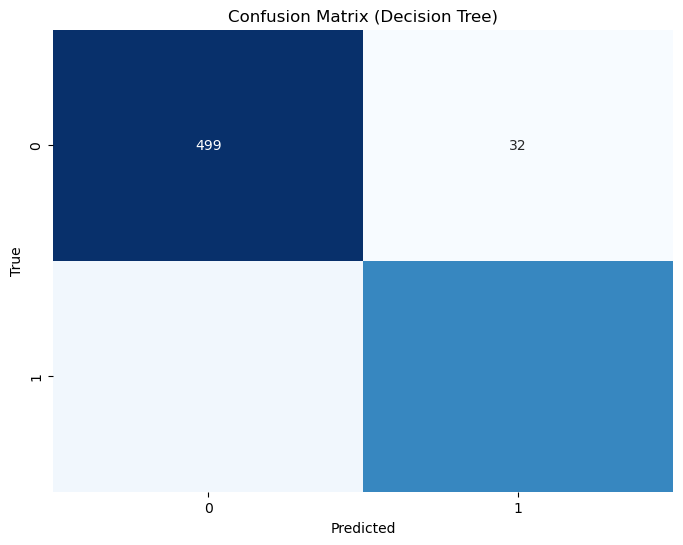

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = decision_tree_model.predict(X_test)

# Calculate misclassification cost
cost_non_spam_to_spam = 1
cost_spam_to_non_spam = 10

misclassification_cost = 0
for true_label, predicted_label in zip(y_test, y_pred):
    if true_label == 0 and predicted_label == 1:  
        misclassification_cost += cost_non_spam_to_spam
    elif true_label == 1 and predicted_label == 0:  
        misclassification_cost += cost_spam_to_non_spam

average_misclassification_cost = misclassification_cost / len(y_test)
print("Average Misclassification Cost:", average_misclassification_cost)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F-measure
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

Average Misclassification Cost (Logistic Regression): 0.511400651465798
Confusion Matrix (Logistic Regression):
[[500  31]
 [ 44 346]]
Precision (Logistic Regression): 0.9177718832891246
Recall (Logistic Regression): 0.8871794871794871
F-measure (Logistic Regression): 0.9022164276401564


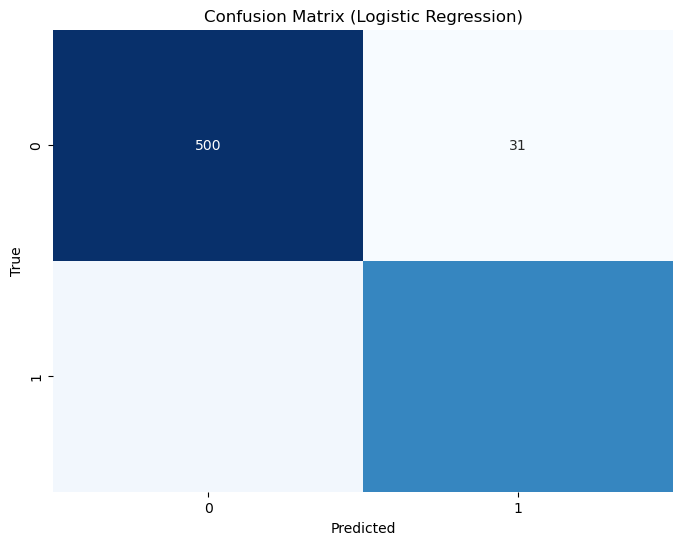

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_logistic = logistic_regression_model.predict(X_test)

# Calculate misclassification cost
cost_non_spam_to_spam = 1
cost_spam_to_non_spam = 10

misclassification_cost_logistic = 0
for true_label, predicted_label in zip(y_test, y_pred_logistic):
    if true_label == 0 and predicted_label == 1:  
        misclassification_cost_logistic += cost_non_spam_to_spam
    elif true_label == 1 and predicted_label == 0:  
        misclassification_cost_logistic += cost_spam_to_non_spam

average_misclassification_cost_logistic = misclassification_cost_logistic / len(y_test)
print("Average Misclassification Cost (Logistic Regression):", average_misclassification_cost_logistic)

# Calculate confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Calculate precision, recall, and F-measure
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
print("Precision (Logistic Regression):", precision_logistic)
print("Recall (Logistic Regression):", recall_logistic)
print("F-measure (Logistic Regression):", f1_logistic)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


Average Misclassification Cost (Logistic Regression): 0.46471226927252984
Precision (Logistic Regression): 0.9023136246786633
Recall (Logistic Regression): 0.9
F-measure (Logistic Regression): 0.9011553273427471


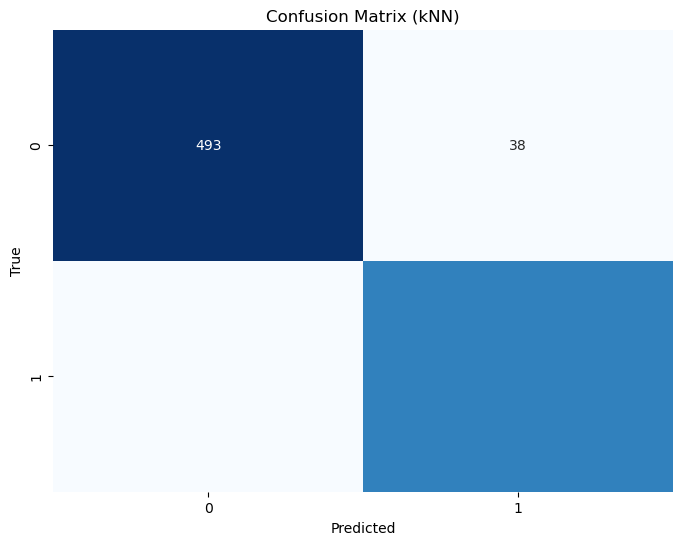

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_knn = optimal_knn_model.predict(X_test)

# Calculate misclassification cost
cost_non_spam_to_spam = 1
cost_spam_to_non_spam = 10

misclassification_cost_logistic = 0
for true_label, predicted_label in zip(y_test, y_pred_knn):
    if true_label == 0 and predicted_label == 1:  
        misclassification_cost_logistic += cost_non_spam_to_spam
    elif true_label == 1 and predicted_label == 0:  
        misclassification_cost_logistic += cost_spam_to_non_spam

average_misclassification_cost_logistic = misclassification_cost_logistic / len(y_test)
print("Average Misclassification Cost (Logistic Regression):", average_misclassification_cost_logistic)

# Calculate confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_knn)

# Calculate precision, recall, and F-measure
precision_logistic = precision_score(y_test, y_pred_knn)
recall_logistic = recall_score(y_test, y_pred_knn)
f1_logistic = f1_score(y_test, y_pred_knn)
print("Precision (Logistic Regression):", precision_logistic)
print("Recall (Logistic Regression):", recall_logistic)
print("F-measure (Logistic Regression):", f1_logistic)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (kNN)")
plt.show()

## ROC Curve

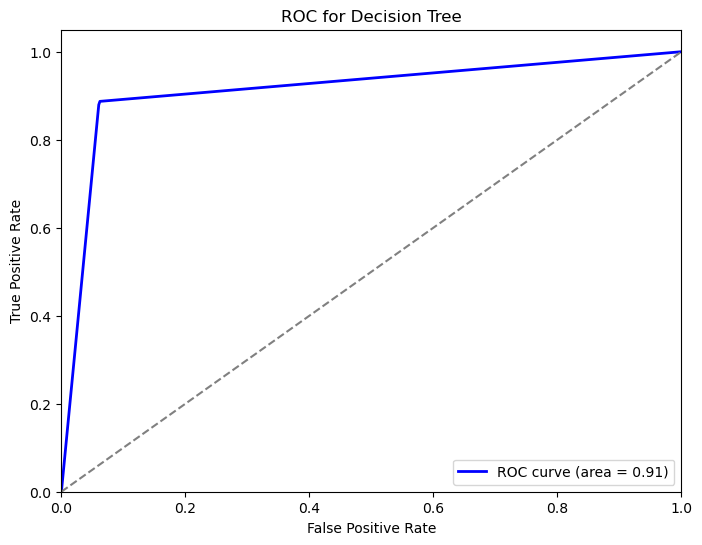

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate probabilities for positive class (spam)
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Calculate ROC & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree')
plt.legend(loc="lower right")
plt.show()

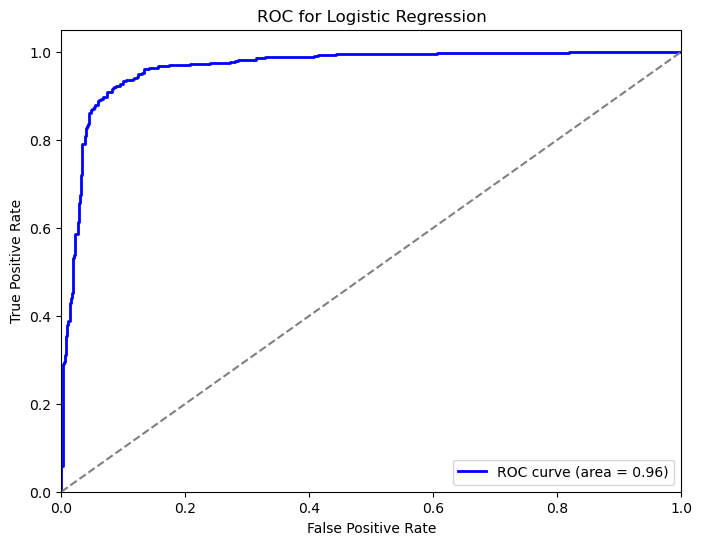

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate probabilities for positive class (spam)
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

# Calculate ROC & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

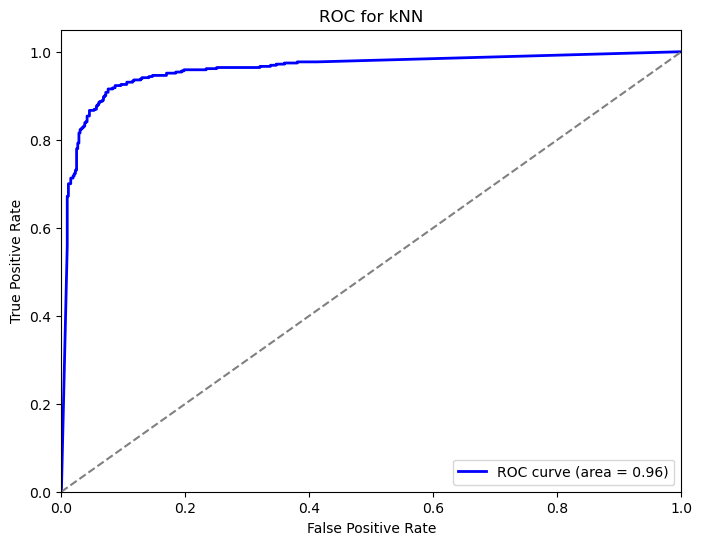

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate probabilities for positive class (spam)
y_prob = optimal_knn_model.predict_proba(X_test)[:, 1]

# Calculate ROC & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for kNN')
plt.legend(loc="lower right")
plt.show()